In [3]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
# set the filepath and load in a shapefile to the map dataframe. we use the geopandas.read_file command for this
fp = "./datasets/geo-data/gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"

map_df = gpd.read_file(fp)

In [5]:
# .head() by default prints out the first 5 lines of the data frame. the important parts of
# this dataframe are the names of the bouroughs and the geometry (shape) of each bourough.

map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


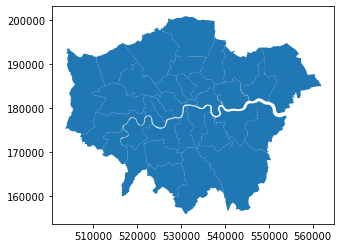

In [6]:
# you can plot this map data frame and you see that it is indeed a map of London. The white lines show
# the borders of the different bouroughs (neighborhoods) colored in the default blue

map_df.plot()

In [7]:
# Now we want to load some data which we will use to color the bouroughs of London
# for this we use the pandas.read_csv command

data_df = pd.read_csv("datasets/london-borough-profile.csv", header=0)

data_df.head()


,Code,borough,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800.0,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100,0.0,36.5
2,E09000003,Barnet,Outer London,389600.0,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300.0,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100.0,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [8]:
# select only the columns that we want to use for the map
data_df = data_df[['borough',
                   'Happiness_score_2011-14_(out_of_10)', 
                   'Anxiety_score_2011-14_(out_of_10)', 
                   'Population_density_(per_hectare)_2017', 
                   'Mortality_rate_from_causes_considered_preventable_2012/14']]


In [9]:

# those are really terrible column names. let's rename them to something simpler
data_df = data_df.rename(index=str, columns={"Happiness_score_2011-14_(out_of_10)": "happiness",
                                      "Anxiety_score_2011-14_(out_of_10)": "anxiety",
                                      "Population_density_(per_hectare)_2017": "pop_density",
                                      "Mortality_rate_from_causes_considered_preventable_2012/14": 'mortality'})

# check dat dataframe
data_df.head()

,borough,happiness,anxiety,pop_density,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [10]:
# you can look at the full data frame just by typing
#data_df

In [11]:
# we now have two data frames which we merge for later plotting
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('NAME').join(data_df.set_index('borough'))

merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",7.4,3.4,49.0,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",7.3,3.6,63.3,164


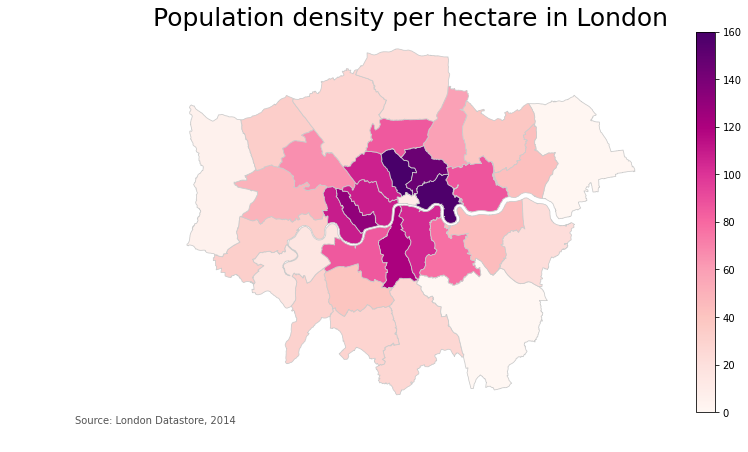

In [12]:
# now we make a much more interesting plot of the city

# set a variable that will call whatever column we want to visualise on the map
variable = 'pop_density'

# set the range for the choropleth
vmin, vmax = 0, 160

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14, 7))

# specify the name of the colormap
cmap = 'RdPu'

# create map
merged.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Population density per hectare in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)


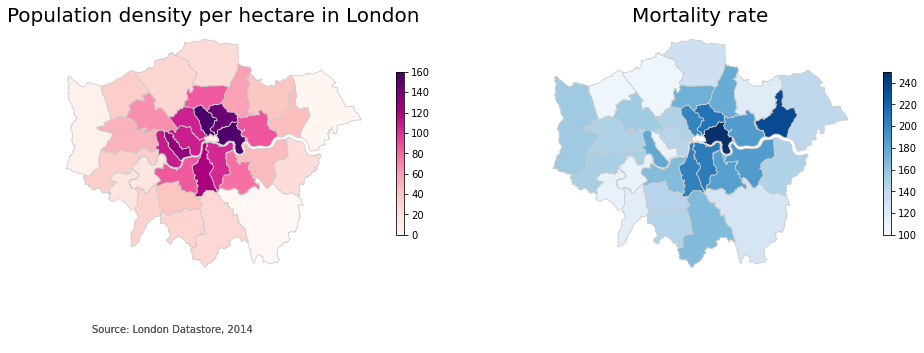

In [13]:
fig = plt.figure(figsize=(16,6))

# set a variable that will call whatever column we want to visualise on the map
variable = 'pop_density'

# set the range for the choropleth
vmin, vmax = 0, 160

#******************************
# create axes #1
ax1 = plt.subplot(121)

# specify the name of the colormap
cmap = 'RdPu'

# create map
merged.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax1, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax1.axis('off')

# add a title
ax1.set_title('Population density per hectare in London', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax1.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)

#******************************
# create axes #2
ax2 = plt.subplot(122)

# set a variable that will call whatever column we want to visualise on the map
variable = 'mortality'

# set the range for the choropleth
vmin, vmax = 100, 250

# specify the name of the colormap
cmap = 'Blues'

# create map
merged.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax2, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax2.axis('off')

# add a title
ax2.set_title('Mortality rate', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax2.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)


# this will save the figure as a high-res png. you can also save as svg
fig.savefig('two_maps.png', dpi=300)
